# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [350]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df= pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [352]:
# Checking the number of mice.
mouse_ID = mouse_study_df["Mouse ID"].nunique()
mouse_ID

249

In [353]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Is there only the one duplicate mouse code? g989

duplicate_mouse = mouse_study_df[mouse_study_df.duplicated()]
duplicate_mouse



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [354]:
np.array([duplicate_mouse.iloc[0, 0]], dtype="object")


array(['g989'], dtype=object)

In [355]:
# Optional: Get all the data for the duplicate mouse ID. 
problem_mouse = mouse_study_df[mouse_study_df["Mouse ID"]== "g989"]
problem_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [356]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [357]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()


248

## Summary Statistics

In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std= cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame(
    {
        "Mean Tumor Volume": tumor_mean,
        "Median Tumor Volume": tumor_median,
        "Tumor Volume Variance": tumor_var,
        "Tumor Volume Std.Dev.": tumor_std,
        "Tumor Volume Std.Err.": tumor_sem
    }
)
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [360]:
#Isolating the Drug and Mouse ID data relevant to chart creation
mouse_drugs = cleaned_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_drug = mouse_drugs.sort_values(ascending=False)
mice_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

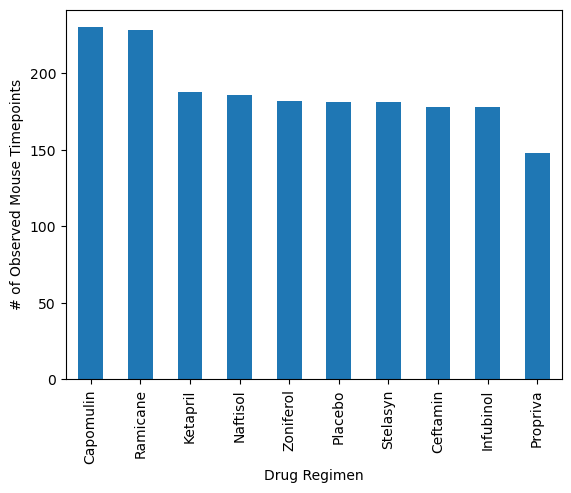

In [361]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


mice_per_drug.plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [362]:
#Creating an array of Drug names to use as x axis value names

drug_regimen=cleaned_df.loc[:,("Drug Regimen")]
drug_name=drug_regimen.unique()
drug_name
#np.array([drug_name])

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

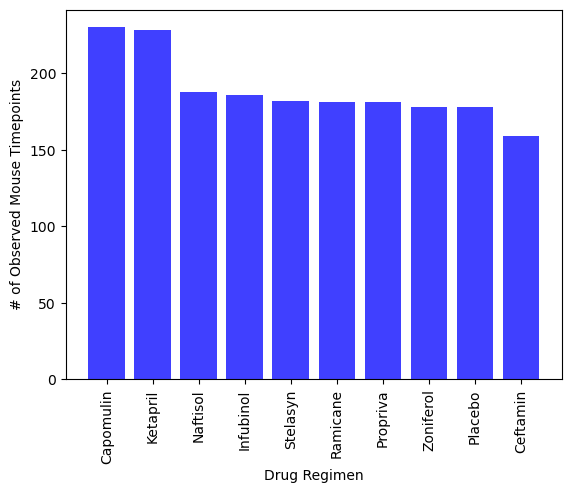

In [177]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mice_per_drug))
plt.bar(x_axis, mice_per_drug, color="b", alpha= 0.75, align="center")
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


In [427]:
sex = cleaned_df.groupby(["Sex"]).count()["Mouse ID"]
#mouse_sex = mouse_drugs.sort_values(ascending=False)
sex

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [183]:
mouse_male_female=mouse_metadata.loc[:,("Sex")]
mouse_sex=mouse_male_female.unique()
mouse_sex

array(['Male', 'Female'], dtype=object)

In [188]:
sex_count=mouse_male_female.value_counts()
np.array(sex_count)

array([125, 124], dtype=int64)

Text(0.5, 1.0, 'Sex')

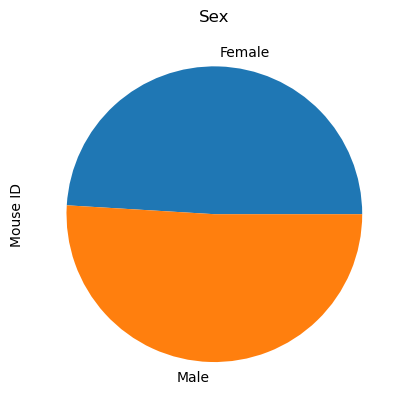

In [428]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex.plot(kind="pie")

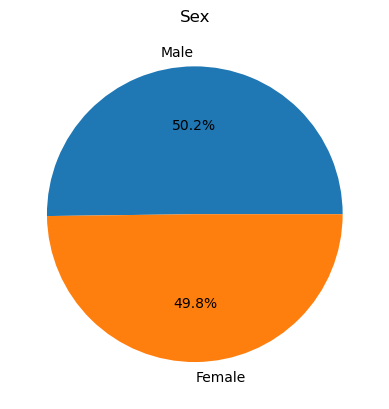

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels = mouse_sex, autopct="%1.1f%%", startangle=0)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [364]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
last_time=cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
last_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor = pd.merge(last_time, cleaned_df, on=["Mouse ID", "Timepoint"], how="left" )
last_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [445]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
master_list=[]


for drug in treatments: 
    tumor_volume=last_tumor.loc[last_tumor["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    master_list.append(tumor_volume)
    
    quartiles=tumor_volume.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    u_bound= upperq + (1.5*iqr)
    l_bound=lowerq - (1.5*iqr)
    
    outliers = (tumor_volume < l_bound) | (tumor_volume > u_bound)
    
    #print(f"{drug}'s potential outliers: {outliers}")
    
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [393]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [366]:
one_mouse = cleaned_df[cleaned_df["Mouse ID"]== "l509"]
one_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21
1726,l509,25,44.006257,2,Capomulin,Male,17,21
1727,l509,30,44.708055,2,Capomulin,Male,17,21
1728,l509,35,40.207288,2,Capomulin,Male,17,21
1729,l509,40,40.770813,2,Capomulin,Male,17,21
1730,l509,45,41.483008,3,Capomulin,Male,17,21


In [222]:
#tumor and time data for mouse l509
l509_mouse = one_mouse[["Timepoint", "Tumor Volume (mm3)"]]
l509_mouse=l509_mouse.set_index("Timepoint")
l509_mouse

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,45.851193
10,46.759074
15,47.488599
20,48.070452
25,44.006257
30,44.708055
35,40.207288
40,40.770813


Text(0.5, 1.0, 'Capomulin Treatment of mouse l509')

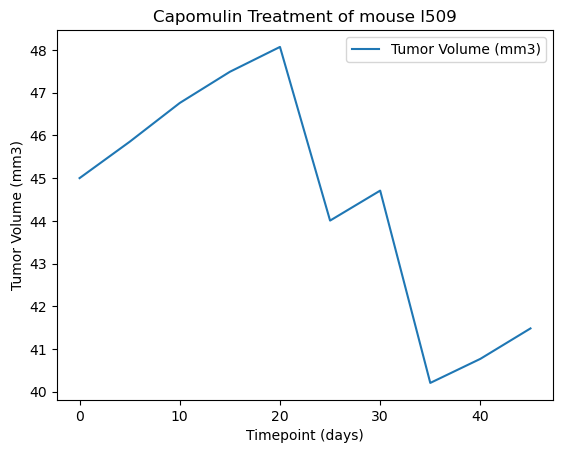

In [224]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_mouse.plot()
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin Treatment of mouse l509")

In [367]:
one_treatment = cleaned_df[cleaned_df["Drug Regimen"]== "Capomulin"]
one_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [368]:


avg_tumor = one_treatment.groupby(["Mouse ID"])["Weight (g)","Tumor Volume (mm3)"].mean()
avg_cap_tumor = pd.DataFrame(avg_tumor)
avg_cap_tumor


C:\Users\annie\AppData\Local\Temp\ipykernel_7788\1412916614.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_tumor = one_treatment.groupby(["Mouse ID"])["Weight (g)","Tumor Volume (mm3)"].mean()


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


C:\Users\annie\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

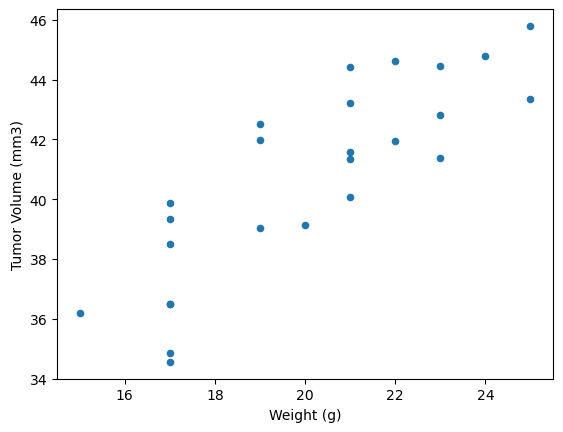

In [369]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#plt.scatter(cap_data, cap_tumor)
avg_cap_tumor.plot.scatter("Weight (g)", "Tumor Volume (mm3)")


## Correlation and Regression

In [420]:
x_values = avg_cap_tumor["Weight (g)"]
y_values = avg_cap_tumor["Tumor Volume (mm3)"]
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x_values, y_values)
pe_fit = pe_slope * x_values + pe_int

correlation=st.pearsonr(x_values, y_values)

The correlation between mouse weight and the average tumor volume is 0.84


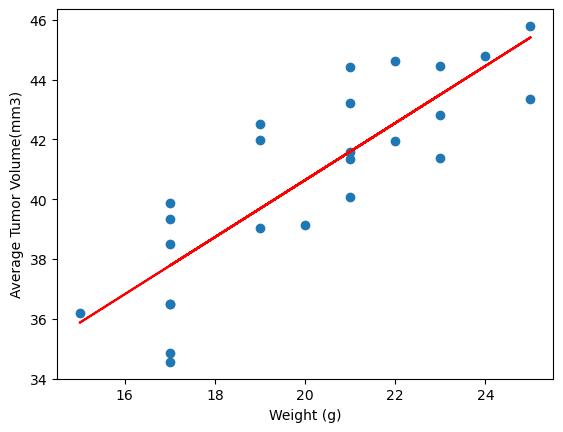

In [422]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(x_values, y_values)
plt.plot(x_values, pe_fit, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()